# Simple Neural Network

## 1. Data Procedure

- We could import some thing needed here in notebook

In [1]:
# # for file path
# import os

# # for data manipulation
# import numpy as np
# import pandas as pd

- Then we initialize a dataloader instance to get what it is like: 

In [2]:
# import the DataLoader
from src.data.DataLoader import DataLoader

# Assuming 'data.csv' is in a folder named 'dataset/data' in the src directory
file_path = 'dataset/data/data.csv'

# Create an instance of DataLoader
data_loader_0 = DataLoader(file_path, shuffle=True)  # setting shuffle to True for testing

# Load the data
data = data_loader_0.load_data()

# Print the first few rows of the data to verify loading
print(data.head())

# Print what type of data is returned
print(type(data))

         x1        x2        x3        x4        x5  target
0  0.308833  1.702215  0.240753  2.601683  0.565510       0
1 -0.819258 -0.476221  0.874389  0.262561  0.193590       1
2  0.250493  0.346448 -0.680025  0.232254  0.293072       0
3 -0.151299 -1.395789  0.591349 -0.723990 -0.195390       1
4  1.117296  0.342725  0.456753  0.569767  0.447709       1
<class 'pandas.core.frame.DataFrame'>


- data_loader is now created, we initialize a data_processor to handle the file

In [3]:
# Import necessary classes
from src.data.DataProcessor import DataProcessor

# Load data using DataLoader (if not already loaded)
data = data_loader_0.load_data()

# Create an instance of DataProcessor
# Assuming normalization is desired and the default split proportions are fine
data_processor_0 = DataProcessor(data_loader_0, normalize=True)

# Process the data to get train, validation, and test sets
train_data, validate_data, test_data = data_processor_0.process_data()

# Optionally, print the shapes of the datasets to verify everything is as expected
print("Train Data Shape:", train_data.shape)
print("Validation Data Shape:", validate_data.shape)
print("Test Data Shape:", test_data.shape)


Train Data Shape: (700, 6)
Validation Data Shape: (150, 6)
Test Data Shape: (150, 6)


- Using BaseDataset to directly create splited and normalized datasets

In [4]:
from src.data.BaseDataset import BaseDataset

# Assume file_path is correctly defined relative to the script running this code
dataset = BaseDataset('dataset/data/data.csv', shuffle=True, normalize=True)
train_data, validate_data, test_data = dataset.prepare_data()

# Optionally, directly access data from the dataset object later
print(dataset.train_data.head())
print(dataset.validate_data.head())
print(dataset.test_data.head())


           x1        x2        x3        x4        x5  target
874 -0.647673  1.750136 -0.039729 -1.138471  0.803696       1
628 -0.349139  0.317278 -1.268197  0.950152 -0.242691       0
638  1.173555 -0.577889  0.018557  0.030247 -0.571822       0
149 -1.948918  0.119075 -0.185281  0.683836  0.170795       0
663  0.798104 -0.250831 -0.304024  0.809288  0.302553       0
           x1        x2        x3        x4        x5  target
415 -0.559298  1.447740  0.633680 -0.998143 -1.709993       0
407 -1.528281  0.289099  0.232794 -0.018323 -0.294297       0
639  0.945894 -0.731459  0.007425 -1.462356  0.677967       1
526 -0.124021 -0.024194 -1.744736  1.551855 -0.007719       0
58   1.094529  0.118325  0.122859 -0.406936 -0.109789       1
           x1        x2        x3        x4        x5  target
337 -1.953861  0.680227 -1.895561 -0.416112  0.403574       0
122  0.336549 -1.062735  0.081426 -0.058735 -0.266803       1
674  0.268566 -1.394656  1.245139 -0.725024  0.699165       1
879 -1.2

- Using matplotlib to plot SOME of the data features

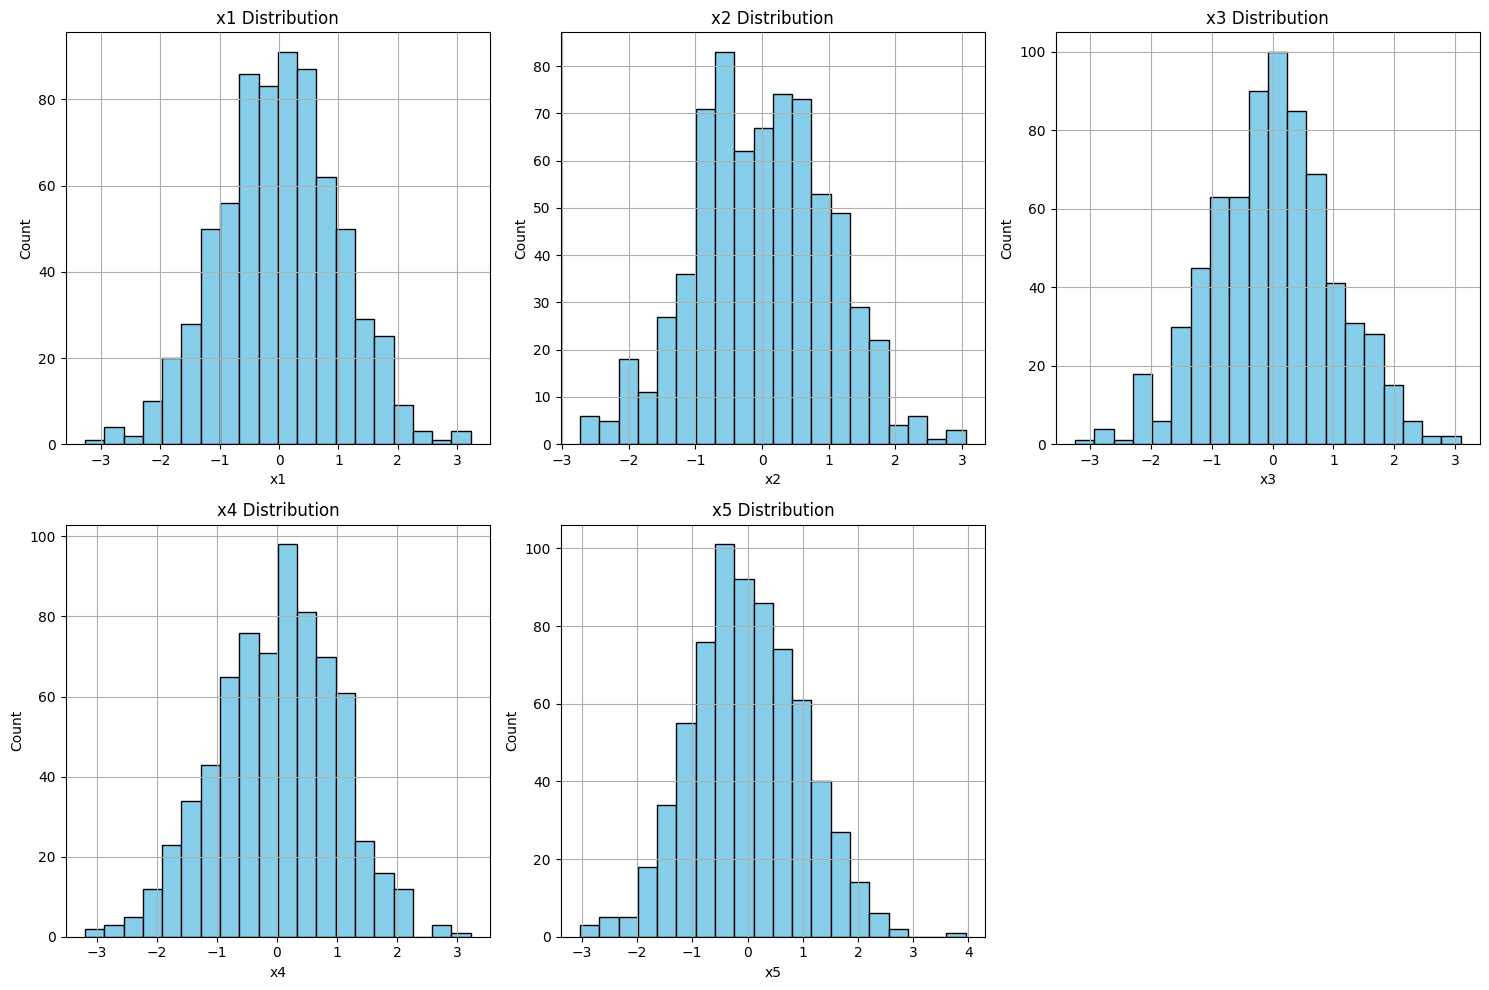

In [5]:
from src.data.Utils_Data import plot_all_histograms

# Plotting the histogram of train_data for 'x1'
plot_all_histograms(dataset.train_data, exclude_columns=['target'])


## 2. Modeling Procedure